<a href="https://colab.research.google.com/github/Ahnaf20/Data-Mining-Kel-8/blob/main/DataMining_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import warnings; warnings.simplefilter('ignore')
import scipy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [59]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dataJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dataD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dataT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dataJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dataD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dataT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')

In [60]:
#melihat tipe, ukuran data depok
N, P = dataD.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataD = ", type(dataD))
dataD.dropna(axis=0, thresh=4, inplace=True)
dataD.dropna(axis=1, how='all', inplace=True)
print(dataD)

#menambahkan kolom Kota pada data depok
dfD = pd.DataFrame(dataD)
dfD_dpk = dfD.assign(Kota = "Depok")
N, P = dfD_dpk.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfD_dpk

baris =  998 , Kolom(jumlah variabel)=  26
Tipe Variabel dataD =  <class 'pandas.core.frame.DataFrame'>
    created_at   LT     LB   KT   KM  garasi  carport     lokasi sertifikat  \
0    6-12-2021  165  200.0  4.0  2.0     NaN      1.0  Sukmajaya        SHM   
1    6-12-2021   50   45.0  2.0  1.0     NaN      NaN   Cipayung        SHM   
2    6-12-2021   50   36.0  2.0  1.0     NaN      1.0   Sawangan        SHM   
3    6-12-2021   50   45.0  2.0  1.0     NaN      NaN  Cimanggis        SHM   
4    6-12-2021   72   45.0  2.0  1.0     NaN      1.0   Sawangan        SHM   
..         ...  ...    ...  ...  ...     ...      ...        ...        ...   
113  4-12-2021   79  115.0  2.0  1.0     1.0      1.0  Sukmajaya        SHM   
114  4-12-2021   72   45.0  2.0  1.0     NaN      1.0  Cimanggis        SHM   
115  4-12-2021   40   40.0  2.0  1.0     NaN      NaN   Cipayung        SHM   
116  4-12-2021   50   50.0  2.0  1.0     NaN      NaN   Cipayung        SHM   
117  4-12-2021  100   15.0 

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur,Depok
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,Depok
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,Depok
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,Depok


In [61]:
#melihat tipe, ukuran data jakarta
N, P = dataJ.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataJ = ", type(dataJ))
dataJ.dropna(axis=0, thresh=4, inplace=True)
dataJ.dropna(axis=1, how='all', inplace=True)
print(dataJ)

#menambahkan kolom Kota pada data jakarta
dfJ = pd.DataFrame(dataJ)
dfJ_jkt = dfJ.assign(Kota = "Jakarta")
N, P = dfJ_jkt.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfJ_jkt

baris =  1024 , Kolom(jumlah variabel)=  26
Tipe Variabel dataJ =  <class 'pandas.core.frame.DataFrame'>
     created_at     LT     LB   KT   KM  garasi  carport         lokasi  \
0    06-12-2021  202.0  198.0  8.0  3.0     NaN      NaN  Jakarta Pusat   
1    02-12-2021   30.0   55.0  2.0  1.0     NaN      1.0  Jakarta Pusat   
2    06-12-2021   19.0   35.0  2.0  1.0     NaN      NaN  Jakarta Pusat   
3    06-12-2021   33.0   42.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
4    06-12-2021   30.0   55.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
..          ...    ...    ...  ...  ...     ...      ...            ...   
116  22-11-2021  220.0  239.0  5.0  4.0     1.0      2.0  Jakarta Timur   
117  06-12-2021   70.0   57.0  3.0  2.0     NaN      2.0  Jakarta Timur   
118  06-12-2021  315.0  280.0  4.0  3.0     1.0      2.0  Jakarta Timur   
119  06-12-2021  135.0  190.0  5.0  5.0     NaN      2.0  Jakarta Timur   
120  06-12-2021  144.0  250.0  5.0  5.0     NaN      2.0  Jakarta Timu

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...,Jakarta
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...,Jakarta
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam...",Jakarta
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...,Jakarta


In [62]:
#melihat tipe, ukuran data tangerang
N, P = dataT.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataT = ", type(dataT))
dataT.dropna(axis=0, thresh=4, inplace=True)
dataT.dropna(axis=1, how='all', inplace=True)
print(dataT)

#menambahkan kolom daerah pada data depok
dfT = pd.DataFrame(dataT)
dfT_tng = dfT.assign(Kota = "Tangerang")
N, P = dfT_tng.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfT_tng

baris =  128 , Kolom(jumlah variabel)=  26
Tipe Variabel dataT =  <class 'pandas.core.frame.DataFrame'>
     created_at     LT     LB   KT   KM  garasi  carport  \
0    12-06-2021   60.0   50.0  3.0  2.0     NaN      NaN   
1    12-06-2021   72.0   54.0  2.0  1.0     1.0      1.0   
2    12-06-2021   60.0   48.0  3.0  2.0     2.0      2.0   
3    12-06-2021  200.0  225.0  5.0  4.0     NaN      NaN   
4    12-06-2021   76.0  123.0  3.0  3.0     NaN      2.0   
..          ...    ...    ...  ...  ...     ...      ...   
119  12-08-2021   60.0   55.0  2.0  2.0     NaN      1.0   
120  12-08-2021   66.0   70.0  3.0  2.0     NaN      1.0   
121  12-08-2021  202.0   85.0  4.0  3.0     1.0      1.0   
122  12-08-2021  108.0  130.0  3.0  3.0     1.0      1.0   
123  12-08-2021   91.0   91.0  3.0  2.0     NaN      NaN   

                        lokasi                       sertifikat  listrik  \
0          BSD CITY, TANGERANG                              SHM   1300.0   
1            CISAUK, TA

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",Tangerang
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",Tangerang
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",Tangerang
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",Tangerang
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang


##Gabungan Data depok, jakarta, dan tangerang

In [63]:
dg = pd.concat([dfD_dpk, dfJ_jkt, dfT_tng], axis = 0)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tangerang
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang


In [64]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 123
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  363 non-null    object 
 1   LT          363 non-null    object 
 2   LB          363 non-null    float64
 3   KT          363 non-null    float64
 4   KM          363 non-null    float64
 5   garasi      107 non-null    float64
 6   carport     276 non-null    float64
 7   lokasi      363 non-null    object 
 8   sertifikat  359 non-null    object 
 9   listrik     334 non-null    float64
 10  hadap       147 non-null    object 
 11  harga       363 non-null    float64
 12  URL         363 non-null    object 
 13  deskripsi   354 non-null    object 
 14  Kota        363 non-null    object 
dtypes: float64(7), object(8)
memory usage: 45.4+ KB


In [65]:
dg.shape

(363, 15)

##Mengganti Tipe Data

In [66]:
dg.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

In [67]:
#mengganti tipe data
dg['LT'] = dg['LT'].astype('int64')
dg['LB'] = dg['LB'].astype('int64')
dg['KM'] = dg['KM'].astype('int64')
dg['KT'] = dg['KT'].astype('int64')

In [68]:
dg.dtypes

created_at     object
LT              int64
LB              int64
KT              int64
KM              int64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

##Cek Duplikasi Data

In [69]:
print(dg.shape)
dg.duplicated().sum()

(363, 15)


0

Tidak ada data yang terduplikasi

##Missing Value

In [70]:
dg.shape

(363, 15)

In [71]:
##mengecek missing value
print(dg.isnull().sum())

created_at      0
LT              0
LB              0
KT              0
KM              0
garasi        256
carport        87
lokasi          0
sertifikat      4
listrik        29
hadap         216
harga           0
URL             0
deskripsi       9
Kota            0
dtype: int64


Data memiliki missing value pada data garasi, carport, listrik dan hadap.

In [72]:
#mengatasi missing value
dg.fillna(0, inplace = True)
print(dg.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
Kota          0
dtype: int64


Missing Value sudah teratasi.

##Statistika Deskriptif

##Visualisasi Data

Apakah daerah berpengaruh terhadap 

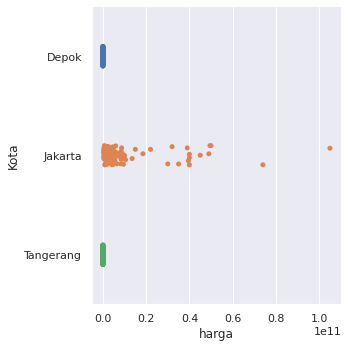

In [73]:
p = sns.catplot(x="harga", y="Kota", data = dg)

Berdasarkan plot diatas dapat dilihat bahwa harga rumah yang cenderung tinggi/mahal berada di kota Jakarta, sedangkan kota Depok dan Tangerang memiliki kisaran harga rumah yang cenderung lebih murah.
Sebaik 